In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

(416, 3)


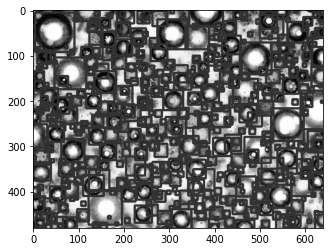

In [2]:
# часть для проверки правильности импорта обучающи данных и отрисовка размеченных вручную сфер на картинке
# загрузка
nameimage = 'image_001.jpg'
nametabl = 'image_001.txt'
image=cv2.imread(nameimage)
krugikoor=np.loadtxt(nametabl)
#преобразование изображения в ч/б и выравнивание гистограммы распределения цветов
imageg=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imagegh = cv2.equalizeHist(imageg)
print(krugikoor.shape)

# отрисовка границ сфер
for y,x,d in (krugikoor):
    imagegh=cv2.rectangle(imagegh,(int(x-d/2),int(480-y+d/2)),(int(x+d/2),int(480-y-d/2)),(50),3)

# вывод результата    
plt.imshow(imagegh,cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
from imutils import paths
imena=list(paths.list_images('./'))
imenat=list.copy(imena)
im=0
for t in imenat:
    imenat[im]=t[:-3]+'txt'
    im=im+1

In [4]:
#подготовка набора обучающих данных для модели на основе предварительно размеченных автором изображений
#ЗАДАЕМ СООТНОШЕНИЕ ДИАМЕТРА ШАРИКА И РАЗМЕРА СКОЛЬЗЯЩЕГО ОКНА sdR 1.6 ИЛИ 4 и вырезаем все нужные изображения в размер ps*ps
sdr=1.4
imn=0
i=0
ps=32
# Массив для хранения изображений воздушных сфер в строчном формате 1024=32*32
imagey=np.zeros((200000,ps**2),dtype='uint8')

# Перечень имеющихся размеченных данных
imgname=imena
txtname=imenat

#Цикл обработки изображений 
while imn<len(imena):
    print(imn)
    #print(imgname[int(imn)])
    # простая аугментация - каждое изображение обрабатывается дважды с выравниванием гистограммы распределения цветов и без
    image=cv2.imread(imgname[int(imn)])
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #gray = cv2.equalizeHist(gray)
    koor_sferi=np.loadtxt(txtname[int(imn)])
    #print(koor_sferi.shape)
    inter=cv2.INTER_AREA
    mean=125
    
    bordersize=int(300)
    gray=cv2.copyMakeBorder(gray, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv2.BORDER_CONSTANT, value=[mean] )
    #cv2.blur(gray,(5,5),cv2.BORDER_DEFAULT)   

    for y,x,d in (koor_sferi):
        if y<0-int(0.1*d):
            y=0
            #print("continue")
            continue
        if y>480+int(0.1*d):
            y=480
            #print("continue")
            continue    
        if x<0-int(0.1*d):
            x=0
            #print("continue")
            continue
        if x>640+int(0.1*d):
            x=640
            #print("continue")
            continue            
        y=y+bordersize
        x=x+bordersize
        # пропуск слижком маленьких сфер      
        if d<12:
            d=12
            #print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 3d
        a=int(x-0.5*sdr*d)
        b=int(x+0.5*sdr*d)
        c=int(480+2*bordersize-y-0.5*sdr*d)
        d=int(480+2*bordersize-y+0.5*sdr*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            #print("continue")
            continue
            
        if a>640+2*bordersize:
            a=640+2*bordersize
            #print("continue")
            continue
        if b<0:
            b=0
            #print("continue")
            continue
        if b>640+2*bordersize:
            b=640+2*bordersize 
            #print("continue")
            continue
        if c<0:
            c=0
            #print("continue")
            continue
        if c>480+2*bordersize:
            c=480+2*bordersize
            #print("continue")
            continue
        if d<0:
            d=0
            #print("continue")
            continue
        if d>480+2*bordersize:
            d=480+2*bordersize
            #print("continue")
            continue
        if int(sdr*d)>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC    

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagey[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1
        
        imagey[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1
        


    imn=imn+1
    #print(imn)
    print(i)

    #print(imagey.shape)


imagey=imagey[:i]

    
we=i

0
2416
1
4480
2
4752
3
7280
4
8264
5
8592
6
8920
7
9248
8
11536
9
11768
10
11976
11
12272
12
12528
13
13224
14
13488
15
13856
16
14232
17
14752
18
16528
19
18552
20
18984
21
20536
22
20968
23
23120
24
23776
25
24168
26
24544
27
24968
28
25296
29
27648
30
29312
31
29696
32
29880
33
30032
34
30448
35
30688
36
31424
37
31680
38
31688
39
32856
40
34072
41
35752
42
36952
43
39112


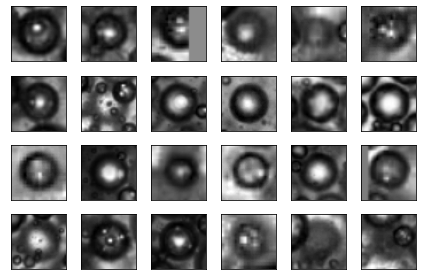

In [5]:
# графическое отражение некоторых из сфер для обучения модели
fig, ax = plt.subplots(nrows=4, ncols=6, sharex= True, sharey = True)
ax=ax.flatten()
for i in range(24):
    img = cv2.resize(imagey[i*1000+1,:].reshape(ps,ps),dsize=(48,48))
    ax[i].imshow(img,cmap=plt.get_cmap('gray'))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#fig.savefig('fig1.jpg')
plt.show()



In [6]:
#Обработка данных для картинок с "не" воздушными сферами

imagen=np.zeros((20000000,ps**2),dtype='uint8')

imn=0
i=0

In [7]:
#сбор случайных фрагментов c проверкой условия не попадания воздушных сфер
kk=i
imn=0
nbol=0




while imn<len(imena):

    #print(imgname[int(imn/2)])
    # простая аугментация - каждое изображение обрабатывается дважды с выравниванием гистограммы распределения цветов и без
    image=cv2.imread(str(imgname[int(imn)]))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #gray = cv2.equalizeHist(gray)
    gray2=gray.copy()
    koor_sferi=np.loadtxt(str(txtname[int(imn)]))
    #print(koor_sferi.shape)
    inter=cv2.INTER_AREA
        
     
    mean=125
    

    
    
    
    
    
    
    
    
    
    
    
    
    #размер изображения не сферы после обработки
    # размер скользящего окна до сжатия
    ws=16
    # шаг движения скользящего окна
    step=6
    # цикл изменения шага и размера окна и сбор изображений не сфер
    for c in range(10):
        ws=int(ws*1.4)
        
        step=int(step*1.3)
        istep=step
        jstep=step
        wstep=int(step*np.random.random())
        hstep=int(step*np.random.random())
        #print('ps=',ws)
        #print('step=',step)


        Ni,Nj = ws,ws
        bordersize=int(ws/2+1)
        grayn=cv2.copyMakeBorder(gray, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv2.BORDER_CONSTANT, value=[mean] )
        cv2.blur(grayn,(3,3),cv2.BORDER_DEFAULT)   
                
        if ws>ps:
            inter=cv2.INTER_AREA
        else:
            inter=cv2.INTER_CUBIC
            
            
        for i in range(wstep,grayn.shape[0]-Ni,int(istep)):
            for j in range(hstep,grayn.shape[1]-Nj,int(jstep)):
                bol=True
                for y,x,d in (koor_sferi):
                    y=y+bordersize
                    x=x+bordersize
                    
                    a=int(x-0.5*sdr*d)
                    c=int(480+2*bordersize-y-0.5*sdr*d)

                    #условие проверки что вырезанное скользящим окном изображение не попадает на сферу с отклонением размера 10%
                    if d>int(ws/sdr/1.12) and d<int(ws/sdr/0.88) and abs(c-i)<int(ws/sdr/9) and abs(a-j)<int(ws/sdr/9):
                        bol=False
                        nbol=1+nbol
                        #print('popal')
                        #print(kk)
                if bol:
                    #if kk>1000+imn*2380:
                        #break
                    imagen[kk,:]=np.reshape(cv2.resize(grayn[i:i+Ni,j:j+Nj],dsize=(ps,ps),interpolation=inter),ps**2)
                    kk=kk+1
        #print(kk)
        #print(imagen.shape)
    
    
    
    print(kk) 
    #print(imn,'new')
    #print(nbol)
    imn=imn+1
    #print(imagen.shape)

16475
33035
49535
66104
82657
99285
115937
132519
149091
165655
182237
198906
215582
232210
248834
265339
281935
298468
315194
331869
348498
365039
381666
398317
415038
431591
448081
464601
481275
497850
514399
531051
547688
564303
581020
597682
614309
630998
647647
664322
680931
697564
713993
730572


In [8]:
#добавляем изображение любого цвета
for i in range(2400):
    imagen[kk+i,:]=np.full((ps**2),int(i/10))

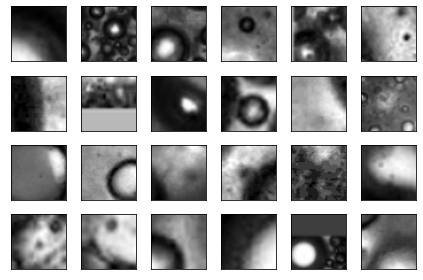

In [9]:
# графическое отражение некоторых изображений не сфер для обучения модели
fig, ax = plt.subplots(nrows=4, ncols=6, sharex= True, sharey = True)
ax=ax.flatten()
for i in range(24):
    img = cv2.resize(imagen[i*15000+500,:].reshape(ps,ps),dsize=(48,48))
    ax[i].imshow(img,cmap=plt.get_cmap('gray'))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#fig.savefig('fig2.jpg')
plt.show()

In [10]:
import pickle
#формирование и сохранение массива данных для последующего обучения моделей
imall=np.vstack((imagey,imagen[:kk+2400,:]))
yy=np.zeros(imall.shape[0])
yy[:(len(imagey))]=1

filename='data14'
pickle.dump((imall,yy), open(filename, 'wb'))

In [11]:
print(kk/we)

18.678973205154428
